In [1]:
from pyspark import SparkContext,SparkConf
sconf = SparkConf().setMaster("yarn").setAppName("employees_data")
sc= SparkContext(conf=sconf)
sc

<SparkContext master=yarn appName=employees_data>

In [2]:
import sys,os

os.environ["SPARK_HOME"] = '/opt/cloudera/parcels/CDH/lib/spark'

sys.path.append('/opt/cloudera/parcels/CDH/lib/spark/python')

sys.path.append('/opt/cloudera/parcels/CDH/lib/spark/python/lib/py4j-0.9-src.zip')

import pyspark

import findspark

findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
spark = SparkSession.builder.appName("employees_data").config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083").enableHiveSupport().getOrCreate()
spark

In [3]:
from pyspark.sql import SQLContext,Row

In [41]:
employees = spark.sql("select * from employee_db.employees")

In [5]:
employees.show(5)

+------+-------------+----------+----------+---------+---+----------+--------------+-----------------------+-----------------+----------+
|emp_no|emp_titles_id|birth_date|first_name|last_name|sex| hire_date|no_of_projects|last_performance_rating|left_organisation| last_date|
+------+-------------+----------+----------+---------+---+----------+--------------+-----------------------+-----------------+----------+
|
|
|
|
|
+------+-------------+----------+----------+---------+---+----------+--------------+-----------------------+-----------------+----------+
only showing top 5 rows



In [6]:
departments = spark.sql("select * from employee_db.departments")

In [7]:
departments.show(5)

+-------+-----------------+
|dept_no|        dept_name|
+-------+-----------------+
|   d001|      "Marketing"|
|   d002|        "Finance"|
|   d003|"Human Resources"|
|   d004|     "Production"|
|   d005|    "development"|
+-------+-----------------+
only showing top 5 rows



In [8]:
dept_emp = spark.sql("select * from employee_db.dept_emp")

In [9]:
dept_emp.show(5)

+------+-------+
|emp_no|dept_no|
+------+-------+
| 10001|   d005|
| 10002|   d007|
| 10003|   d004|
| 10004|   d004|
| 10005|   d003|
+------+-------+
only showing top 5 rows



In [10]:
dept_managers = spark.sql("select * from employee_db.dept_managers")

In [11]:
dept_managers.show(5)

+-------+------+
|dept_no|emp_no|
+-------+------+
|   d001|110022|
|   d001|110039|
|   d002|110085|
|   d002|110114|
|   d003|110183|
+-------+------+
only showing top 5 rows



In [12]:
titles = spark.sql("select * from employee_db.titles")

In [13]:
titles.show(5)

+--------+------------------+
|title_id|             title|
+--------+------------------+
|   e0001|Assistant Engineer|
|   e0002|          Engineer|
|   e0003|   Senior Engineer|
|   e0004|  Technique Leader|
|   m0001|           Manager|
+--------+------------------+
only showing top 5 rows



In [14]:
salaries = spark.sql("select * from employee_db.salaries")

In [15]:
salaries.show(5)

+------+------+
|emp_no|salary|
+------+------+
| 10001| 60117|
| 10002| 65828|
| 10003| 40006|
| 10004| 40054|
| 10005| 78228|
+------+------+
only showing top 5 rows



In [16]:
# A list showing employee number, last name, first name, sex, and salary for each employee
spark.sql("""select e.emp_no,last_name,first_name,sex,salary from employees e left join salary s 
            on e.emp_no =  s.emp_no""").show()

+------+-----------+----------+---+------+
|emp_no|  last_name|first_name|sex|salary|
+------+-----------+----------+---+------+
| 10001|    Facello|    Georgi|  M| 60117|
| 10002|     Simmel|   Bezalel|  F| 65828|
| 10003|    Bamford|     Parto|  M| 40006|
| 10004|    Koblick| Chirstian|  M| 40054|
| 10005|   Maliniak|   Kyoichi|  M| 78228|
| 10006|    Preusig|    Anneke|  F| 40000|
| 10007|  Zielinski|   Tzvetan|  F| 56724|
| 10008|   Kalloufi|    Saniya|  M| 46671|
| 10009|       Peac|    Sumant|  F| 60929|
| 10010|   Piveteau| Duangkaew|  F| 72488|
| 10011|      Sluis|      Mary|  F| 42365|
| 10012|  Bridgland|  Patricio|  M| 40000|
| 10013|     Terkki| Eberhardt|  M| 40000|
| 10014|      Genin|     Berni|  M| 46168|
| 10015|  Nooteboom|  Guoxiang|  M| 40000|
| 10016|Cappelletti|  Kazuhito|  M| 70889|
| 10017|  Bouloucos| Cristinel|  F| 71380|
| 10018|       Peha|  Kazuhide|  F| 55881|
| 10019|    Haddadi|   Lillian|  M| 44276|
| 10020|    Warwick|    Mayuko|  M| 40000|
+------+---

In [27]:
# A list showing first name, last name, and hire date for employees who were hired in 1986.
spark.sql("""select first_name,last_name,hire_date from employees 
            where hire_date like '%1986'
            order by hire_date""").show()

+----------+-------------+---------+
|first_name|    last_name|hire_date|
+----------+-------------+---------+
| Achilleas|        Kroft| 1/1/1986|
|     Mario|     Orlowska| 1/1/1986|
|     Jiann|      Bondorf| 1/1/1986|
|  Nathalie|        Speer| 1/1/1986|
|   Boriana|      Vingron| 1/1/1986|
| Kwangyoen|       Karlin| 1/1/1986|
|   Eishiro|      Curless| 1/1/1986|
|  Hercules|      Veevers| 1/1/1986|
| Kwangyoen|        Rosca| 1/1/1986|
|   Toshiko|       Felder| 1/1/1986|
|    Saniya|     Lanphier| 1/1/1986|
|    Sanjay|    Servieres| 1/1/1986|
|  Domenick|     Dehkordi| 1/1/1986|
|   Tianruo|        Demri| 1/1/1986|
|     Basil|      Matteis| 1/1/1986|
|     Danae|    Nyanchama| 1/1/1986|
| Juichirou|        Munke| 1/1/1986|
|   Youssef|      Janocha| 1/1/1986|
|    Poorav|Papastamatiou| 1/1/1986|
|      Moie|  McConalogue| 1/1/1986|
+----------+-------------+---------+
only showing top 20 rows



In [28]:
# A list showing the manager of each department with the following information: department number, department name,
# the manager's employee number, last name, first name.

spark.sql("""select  dm.dept_no,dept_name,dm.emp_no,first_name,last_name 
            from dept_managers dm  left join departments d on dm.dept_no=d.dept_no 
            left join employees e on dm.emp_no = e.emp_no""").show()


+-------+--------------------+------+-----------+------------+
|dept_no|           dept_name|emp_no| first_name|   last_name|
+-------+--------------------+------+-----------+------------+
|   d001|         "Marketing"|110022|  Margareta|  Markovitch|
|   d001|         "Marketing"|110039|   Vishwani|    Minakawa|
|   d002|           "Finance"|110085|       Ebru|       Alpin|
|   d002|           "Finance"|110114|      Isamu|  Legleitner|
|   d003|   "Human Resources"|110183|    Shirish|Ossenbruggen|
|   d003|   "Human Resources"|110228|    Karsten|     Sigstam|
|   d004|        "Production"|110303|  Krassimir|     Wegerle|
|   d004|        "Production"|110344|     Rosine|       Cools|
|   d004|        "Production"|110386|       Shem|      Kieras|
|   d004|        "Production"|110420|      Oscar|    Ghazalie|
|   d005|       "development"|110511|   DeForest|    Hagimont|
|   d005|       "development"|110567|       Leon|    DasSarma|
|   d006|"Quality Management"|110725|  Peternela|     O

In [29]:
# A list showing the department of each employee with the following information: employee number, last name, first
# name, and department name.

spark.sql("""select e.emp_no,first_name,last_name,dept_name from employees e 
            join dept_emp de on e.emp_no=de.emp_no 
            join departments d on de.dept_no=d.dept_no""").show()

+------+----------+-----------+--------------------+
|emp_no|first_name|  last_name|           dept_name|
+------+----------+-----------+--------------------+
| 10001|    Georgi|    Facello|       "development"|
| 10002|   Bezalel|     Simmel|             "Sales"|
| 10003|     Parto|    Bamford|        "Production"|
| 10004| Chirstian|    Koblick|        "Production"|
| 10005|   Kyoichi|   Maliniak|   "Human Resources"|
| 10006|    Anneke|    Preusig|       "development"|
| 10007|   Tzvetan|  Zielinski|          "Research"|
| 10008|    Saniya|   Kalloufi|       "development"|
| 10009|    Sumant|       Peac|"Quality Management"|
| 10010| Duangkaew|   Piveteau|"Quality Management"|
| 10010| Duangkaew|   Piveteau|        "Production"|
| 10011|      Mary|      Sluis|  "Customer Service"|
| 10012|  Patricio|  Bridgland|       "development"|
| 10013| Eberhardt|     Terkki|   "Human Resources"|
| 10014|     Berni|      Genin|       "development"|
| 10015|  Guoxiang|  Nooteboom|          "Rese

In [30]:
# A list showing first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B.“
spark.sql("""select first_name,last_name,sex  from employees 
            where first_name like 'Hercules' and last_name like 'B%' """).show()

+----------+-------------+---+
|first_name|    last_name|sex|
+----------+-------------+---+
|  Hercules|   Benzmuller|  M|
|  Hercules|      Brendel|  F|
|  Hercules|   Baranowski|  M|
|  Hercules|     Barreiro|  M|
|  Hercules|         Baer|  M|
|  Hercules|Bernardinello|  F|
|  Hercules|      Basagni|  M|
|  Hercules|        Biran|  F|
|  Hercules|    Bernatsky|  M|
|  Hercules|         Bail|  F|
|  Hercules|        Birge|  F|
|  Hercules|      Bisiani|  F|
|  Hercules|       Bodoff|  M|
|  Hercules|        Biron|  F|
|  Hercules|      Buchter|  M|
|  Hercules|         Bain|  F|
|  Hercules|         Bahr|  M|
|  Hercules|         Baak|  M|
|  Hercules|     Benantar|  F|
|  Hercules|      Berstel|  F|
+----------+-------------+---+



In [31]:
# A list showing all employees in the Sales department, including their employee number, last name, first name, and
# department name.

spark.sql("""select e.emp_no,first_name,last_name,dept_name from employees e 
             join dept_emp de on e.emp_no=de.emp_no 
             join departments d on de.dept_no=d.dept_no
             where d.dept_name = '"Sales"'""").show()

+------+----------+------------+---------+
|emp_no|first_name|   last_name|dept_name|
+------+----------+------------+---------+
| 10002|   Bezalel|      Simmel|  "Sales"|
| 10016|  Kazuhito| Cappelletti|  "Sales"|
| 10034|     Bader|        Swan|  "Sales"|
| 10041|       Uri|      Lenart|  "Sales"|
| 10050|   Yinghua|      Dredge|  "Sales"|
| 10053|    Sanjiv|    Zschoche|  "Sales"|
| 10060|  Breannda| Billingsley|  "Sales"|
| 10061|       Tse|      Herber|  "Sales"|
| 10068|  Charlene|     Brattka|  "Sales"|
| 10087|   Xinglin|     Eugenio|  "Sales"|
| 10088|  Jungsoon|    Syrzycki|  "Sales"|
| 10089| Sudharsan|Flasterstein|  "Sales"|
| 10093|   Sailaja|     Desikan|  "Sales"|
| 10095|    Hilari|      Morton|  "Sales"|
| 10099|    Valter|     Sullins|  "Sales"|
| 10101|     Perla|      Heyers|  "Sales"|
| 10107|      Dung|        Baca|  "Sales"|
| 10125|     Syozo|     Hiltgen|  "Sales"|
| 10136|    Zissis|    Pintelas|  "Sales"|
| 10148|    Douadi|       Azumi|  "Sales"|
+------+---

In [32]:
# A list showing all employees in the Sales and Development departments, including their employee number, last name,
# first name, and department name.

spark.sql("""select e.emp_no,first_name,last_name,dept_name from employees e 
             join dept_emp de on e.emp_no=de.emp_no 
             join departments d on de.dept_no=d.dept_no
             where dept_name ='"Sales"' or dept_name = '"development"'""").show()

+------+----------+-----------+-------------+
|emp_no|first_name|  last_name|    dept_name|
+------+----------+-----------+-------------+
| 10001|    Georgi|    Facello|"development"|
| 10002|   Bezalel|     Simmel|      "Sales"|
| 10006|    Anneke|    Preusig|"development"|
| 10008|    Saniya|   Kalloufi|"development"|
| 10012|  Patricio|  Bridgland|"development"|
| 10014|     Berni|      Genin|"development"|
| 10016|  Kazuhito|Cappelletti|      "Sales"|
| 10018|  Kazuhide|       Peha|"development"|
| 10021|     Ramzi|       Erde|"development"|
| 10022|    Shahaf|     Famili|"development"|
| 10023|     Bojan| Montemayor|"development"|
| 10025| Prasadram|     Heyers|"development"|
| 10027|    Divier|    Reistad|"development"|
| 10028|  Domenick|   Tempesti|"development"|
| 10031|   Karsten|     Joslin|"development"|
| 10034|     Bader|       Swan|      "Sales"|
| 10037|   Pradeep|   Makrucki|"development"|
| 10040|     Weiyi|    Meriste|"development"|
| 10041|       Uri|     Lenart|   

In [33]:
# A list showing the frequency count of employee last names, in descending order. ( i.e., how many employees share each last name

spark.sql("""Select last_name, count(last_name) as frequency from employees
             group by last_name 
             order by frequency desc""").show()

+-----------+---------+
|  last_name|frequency|
+-----------+---------+
|       Baba|      226|
|     Gelosh|      223|
|      Coorg|      223|
|    Sudbeck|      222|
|     Farris|      222|
|     Adachi|      221|
|     Osgood|      220|
|     Masada|      218|
|     Neiman|      218|
|    Mandell|      218|
|    Wendorf|      217|
|Boudaillier|      217|
|   Cummings|      216|
|    Solares|      216|
|     Pettis|      216|
|     Mahnke|      216|
|     Emmart|      215|
|    Kulisch|      215|
|   Collette|      215|
| Maksimenko|      215|
+-----------+---------+
only showing top 20 rows



In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
# Histogram to show the salary distribution among the employees
salary_pd = salaries.toPandas()

In [50]:
salary_pd.describe()

,emp_no,salary
count,300024.000000,300024.000000
mean,253321.763392,52970.732451
std,161828.235540,14301.478491
min,10001.000000,40000.000000
25%,85006.750000,40000.000000
50%,249987.500000,48681.000000
75%,424993.250000,61758.000000
max,499999.000000,129492.000000


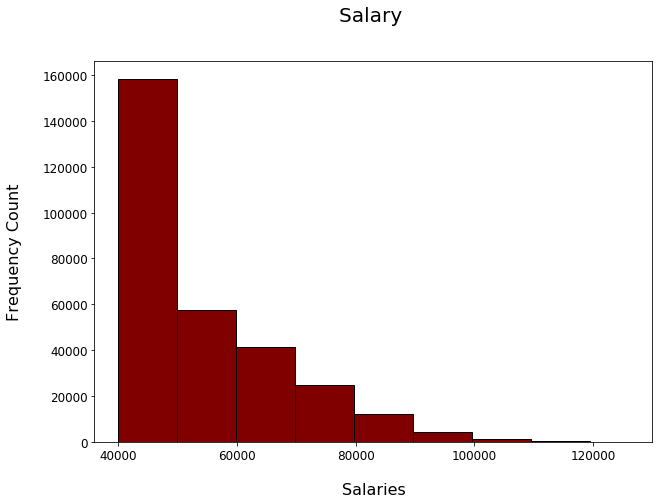

In [52]:
plt.rcParams['figure.figsize']=(10,7)
plt.hist(salary_pd['salary'],bins=9,color='maroon',alpha=1,edgecolor='black')
plt.title('Salary ',fontsize=20,pad=40)
plt.xlabel('Salaries',fontsize=16,color='black',labelpad=20)
plt.ylabel('Frequency Count',fontsize=16,color='black',labelpad=20)
plt.xlim(36000,130000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [53]:
# Bar graph to show the Average salary per title (designation)
avg_salary = spark.sql("""select title,avg(salary) as avg_salary from employees e 
                          join titles t on e.emp_titles_id = t.title_id
                          join salaries s on s.emp_no = e.emp_no
                          group by title""")

In [54]:
avg_salary.show()

+------------------+------------------+
|             title|        avg_salary|
+------------------+------------------+
|             Staff| 58465.38285033152|
|Assistant Engineer| 48564.43444730077|
|      Senior Staff| 58550.17270435993|
|   Senior Engineer| 48506.79987109579|
|          Engineer|48535.336511426336|
|           Manager|51531.041666666664|
|  Technique Leader| 48582.89609189332|
+------------------+------------------+



In [55]:
avg_salary_pd = avg_salary.toPandas()

In [56]:
avg_salary_pd.head()

,title,avg_salary
0,Staff,58465.382850
1,Assistant Engineer,48564.434447
2,Senior Staff,58550.172704
3,Senior Engineer,48506.799871
4,Engineer,48535.336511


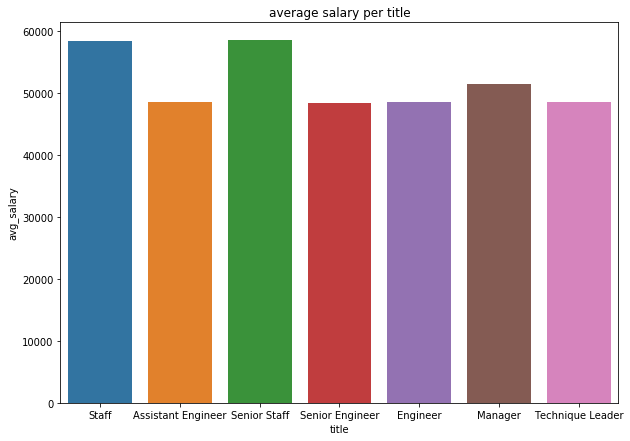

In [57]:
plt.figure(figsize=(10,7))
sns.barplot(data=avg_salary_pd,x='title',y='avg_salary')
plt.xlabel('title')
plt.ylabel('avg_salary')
plt.title('average salary per title')
plt.show()

In [25]:
# list the salary distribution by gender
gender_salary = spark.sql("select sex,salary from employees e join salaries s on e.emp_no = s.emp_no")


In [26]:
gender_salarypd = gender_salary.toPandas()
gender_salary1 = gender_salarypd.groupby('sex')['salary'].sum()
gender_salary1.head()

sex
F    6.357161e+09
M    9.535330e+09
Name: salary, dtype: float64

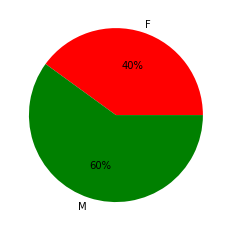

In [28]:
plt.pie(gender_salary1,labels= ['F','M'],autopct="%1.0f%%", colors = ['r','g'])

plt.show()

In [29]:
# list the salary distribution by departtments

dept_project = spark.sql("""select salary,dept_name from employees e join salaries s on e.emp_no = s.emp_no
                            join dept_emp de on de.emp_no = e.emp_no 
                            join departments d on d.dept_no = de.dept_no""")

In [32]:
dept_projectpd = dept_project.toPandas()
dept_project1 = dept_projectpd.groupby('dept_name')['salary'].sum()

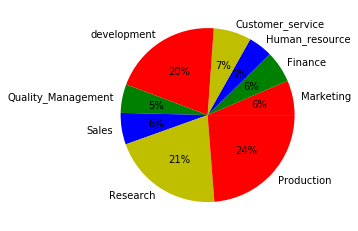

In [34]:
plt.pie(dept_project1,labels =['Marketing','Finance','Human_resource','Customer_service','development','Quality_Management','Sales','Research','Production'],autopct="%1.0f%%", colors = ['r','g','b','y'])


plt.show()

In [56]:
employees.createOrReplaceTempView("employees")
departments.createOrReplaceTempView("departments")
dept_emp.createOrReplaceTempView("dept_emp")
titles.createOrReplaceTempView("titles")
salaries.createOrReplaceTempView("salaries")
dept_managers.createOrReplaceTempView("dept_managers")

In [51]:
# Performance rating distribution

spark.sql("""select  e.emp_no,first_name,last_name,dept_name,
                case 
                when last_performance_rating == 'S' then 'Excellent'
                when last_performance_rating == 'PIP' then 'Poor'
                else 'Good'
                end as Employee_rating from employees e join dept_emp de on e.emp_no = de.emp_no
                join departments d on d.dept_no = de.dept_no
                order by Employee_rating""").show()

+------+----------+---------+--------------------+---------------+
|emp_no|first_name|last_name|           dept_name|Employee_rating|
+------+----------+---------+--------------------+---------------+
| 10057|      Ebbe| Callaway|       "development"|      Excellent|
| 10752|     Byong|    Conde|"Quality Management"|      Excellent|
| 10096|    Jayson|  Mandell|        "Production"|      Excellent|
| 10107|      Dung|     Baca|             "Sales"|      Excellent|
| 10139|     Ewing|    Foong|       "development"|      Excellent|
| 10201|     Idoia|  Kavraki|       "development"|      Excellent|
| 10253|     Zsolt|  Salinas|             "Sales"|      Excellent|
| 10275|     Marek|     Luck|       "development"|      Excellent|
| 10394|    Shawna|  Meriste|       "development"|      Excellent|
| 10410|  Takahito|   Gecsei|             "Sales"|      Excellent|
| 10422|    Greger|   Rubsam|"Quality Management"|      Excellent|
| 10422|    Greger|   Rubsam|        "Production"|      Excell

In [61]:
# list the employee full name with employee number,job title,department name and salary

spark.sql("""select e.emp_no,concat(first_name,' ',last_name) as emp_name,dept_name,salary from employees e 
          join titles t on e.emp_titles_id = t.title_id
          join dept_emp de on de.emp_no = e.emp_no
          join salaries s on s.emp_no = e.emp_no
          join departments d on d.dept_no = de.dept_no""").show()

+------+--------------------+--------------------+------+
|emp_no|            emp_name|           dept_name|salary|
+------+--------------------+--------------------+------+
| 10001|      Georgi Facello|       "development"| 60117|
| 10002|      Bezalel Simmel|             "Sales"| 65828|
| 10003|       Parto Bamford|        "Production"| 40006|
| 10004|   Chirstian Koblick|        "Production"| 40054|
| 10005|    Kyoichi Maliniak|   "Human Resources"| 78228|
| 10006|      Anneke Preusig|       "development"| 40000|
| 10007|   Tzvetan Zielinski|          "Research"| 56724|
| 10008|     Saniya Kalloufi|       "development"| 46671|
| 10009|         Sumant Peac|"Quality Management"| 60929|
| 10010|  Duangkaew Piveteau|"Quality Management"| 72488|
| 10010|  Duangkaew Piveteau|        "Production"| 72488|
| 10011|          Mary Sluis|  "Customer Service"| 42365|
| 10012|  Patricio Bridgland|       "development"| 40000|
| 10013|    Eberhardt Terkki|   "Human Resources"| 40000|
| 10014|      

In [64]:
# list the employees who left organisation
spark.sql("""select emp_no,first_name,last_name,left_organisation,last_date from employees
              where left_organisation == 1
              """).show()

+------+----------+----------+-----------------+----------+
|emp_no|first_name| last_name|left_organisation| last_date|
+------+----------+----------+-----------------+----------+
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
| 10232|     Marko|     Auria|             true|12/30/1998|
+------+----------+----------+-----------------+----------+
only showing top 20 rows



In [67]:
# # list the employees whose last_name starting with 'ANGEL'
spark.sql("""select emp_no,first_name,last_name,sex from employees 
              where last_name like 'Angel%'""").show()

+------+----------+------------+---+
|emp_no|first_name|   last_name|sex|
+------+----------+------------+---+
| 10315|     Maris|Angelopoulos|  M|
| 10617|  Hidekazu|       Angel|  F|
| 12000|    Claudi|     Angelov|  M|
| 12090| Shigenori|Angelopoulos|  F|
| 14675|    Teunis|       Angel|  F|
| 14982|   Kaijung|     Angelov|  F|
| 15661|      Zine|     Angelov|  F|
| 15932|    Zijian|Angelopoulos|  M|
| 16316|  Breannda|     Angelov|  M|
| 17124|   Amabile|Angelopoulos|  F|
| 17179|    Kellyn|       Angel|  F|
| 17214|     Danel|     Angelov|  M|
| 17690| Panayotis|Angelopoulos|  F|
| 17986|      Oguz|Angelopoulos|  M|
| 19538|   Rasikan|     Angelov|  M|
| 19755| Stabislas|Angelopoulos|  F|
| 20687| Augustine|     Angelov|  M|
| 21214|     Weiru|     Angelov|  F|
| 22869|      Kish|     Angelov|  M|
| 23256|     Jinxi|     Angelov|  F|
+------+----------+------------+---+
only showing top 20 rows

